# E.N.I.T.  --  AU: 2022-2023                                


# Project--  Deep learning


#  Sentiment analysis using textual dataset. 


# Classes :3ATel--Dasec 

Elèves Ingénieurs: Ahmed Monsri & Chiheb Sahbani  


# Installing all the requirements from the requirements text file 

In [11]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.8.1
    Uninstalling tensorflow-datasets-4.8.1:
      Successfully uninstalled tensorflow-datasets-4.8.1


In [12]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
! cp kaggle.json ~/.kaggle/

In [15]:
! chmod 600 ~/.kaggle/kaggle.json

In [16]:
!kaggle datasets download -d kazanova/sentiment140

 96% 78.0M/80.9M [00:04<00:00, 22.8MB/s]
100% 80.9M/80.9M [00:04<00:00, 17.1MB/s]


In [17]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


# Imports

In [18]:
import pandas as pd
import numpy as np


In [19]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.preprocessing.text import Tokenizer
import seaborn as sns 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Embedding
from keras.layers import LSTM
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading the data 

In [20]:
# Read the CSV file into a dataframe
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1", engine="python")

In [21]:
df.columns = ["target", "ids", "date", "query", "username", "text"]

# Exploratory data analysis 

In [22]:
df.head()

,target,ids,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [23]:
#Five last records of data
df.tail()

,target,ids,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [24]:
#Length of data
print('lenght of data is', len(df))

lenght of data is 1599999


In [25]:
#Shape of data
df.shape

(1599999, 6)

In [26]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1599999 non-null  int64 
 1   ids       1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [27]:
#Data types of all coloumns
df.dtypes

target       int64
ids          int64
date        object
query       object
username    object
text        object
dtype: object

In [28]:
#Checking Null values
np.sum(df.isnull().any(axis=1))

0

In [29]:
#Rows and columns in the dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1599999


# Data Preparation

In [30]:
#Selection of interested coloumns

In [31]:
#Selecting the text and label coloumn
df=df[['text','target']]

In [32]:
df['target']

0          0
1          0
2          0
3          0
4          0
          ..
1599994    4
1599995    4
1599996    4
1599997    4
1599998    4
Name: target, Length: 1599999, dtype: int64

In [33]:
#Assigning 1 to Positive sentment 4
df['target'][df['target']==4]=1

In [34]:
df['target']

0          0
1          0
2          0
3          0
4          0
          ..
1599994    1
1599995    1
1599996    1
1599997    1
1599998    1
Name: target, Length: 1599999, dtype: int64

In [35]:
#Separating positive and negative tweets
data_pos = df[df['target'] == 1]
data_neg = df[df['target'] == 0]

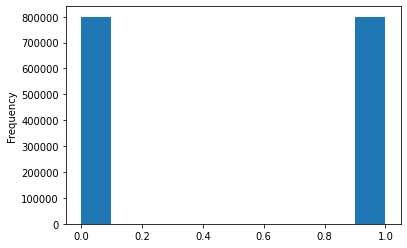

In [36]:
#checking the data distribution.
df['target'].plot(kind='hist')

In [37]:
#taking one fourth data so we can run on our machine easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
print(data_pos)

                                                     text  target
799999       I LOVE @Health4UandPets u guys r the best!!        1
800000  im meeting up with one of my besties tonight! ...       1
800001  @DaRealSunisaKim Thanks for the Twitter add, S...       1
800002  Being sick can be really cheap when it hurts t...       1
800003    @LovesBrooklyn2 he has that effect on everyone        1
...                                                   ...     ...
819994  We just met some awesome people at T.G.I Fridays        1
819995  oh my goodness . my feet are the most sensitiv...       1
819996                                  @hey_angy hahaha        1
819997  @Lamartian30 Pfft school is koo. I'm ranked 2n...       1
819998  stuffed. working out, shower,movie night, thn ...       1

[20000 rows x 2 columns]


In [38]:
#Combining positive and negative tweets
df = pd.concat([data_pos, data_neg])

In [39]:
#Making statement text in lower case
df['text']=df['text'].str.lower()
df['text'].tail()

19995                            one more day of holidays 
19996    feeling so down right now .. i hate you damn h...
19997    geez,i hv to read the whole book of personalit...
19998    i threw my sign at donnie and he bent over to ...
19999    @heather2711 good thing i didn't find any then...
Name: text, dtype: object

In [40]:
#Cleaning and removing Stop words of english
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
#stocking all the stop words in string
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [42]:
#Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].tail()

19995                                     one day holidays
19996                   feeling right .. hate damn humprey
19997    geez,i hv read whole book personality types em...
19998     threw sign donnie bent get thingee made sad face
19999    @heather2711 good thing find none ones like co...
Name: text, dtype: object

In [43]:
#Cleaning and removing punctuations
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda y: cleaning_punctuations(y))
df['text'].tail()

19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    heather2711 good thing find none ones like com...
Name: text, dtype: object

In [44]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [45]:
#Cleaning and removing email
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)
df['text']= df['text'].apply(lambda x: cleaning_email(x))
df['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [46]:
#Cleaning and removing URL's
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [47]:
#Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather god thing find none ones like come siz...
Name: text, dtype: object

In [48]:
#Getting tokenization of tweet text
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(tokenizer.tokenize)
df['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [49]:
#Applying Stemming
#st = nltk.PorterStemmer()
#def stemming_on_text(data):
#    text = [st.stem(word) for word in data]
#    return text
#df['text']= df['text'].apply(lambda x: stemming_on_text(x))
#df['text'].head()

In [50]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [51]:
#Applying Lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].head()

799999              [love, healthuandpets, u, guy, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurt, much, eat, real, fo...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [52]:
#Separating input feature and label
X=df.text
y=df.target
print(X.shape)
print(y.shape)


(40000,)
(40000,)


Preparing the input features for training:
-We converting the text words into arrays form.
-Maximum 500 features/words selected for training. 
-These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets.

In [53]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [54]:
sequences_matrix.shape
#As we can see that there total 40000 tweets and the number words/features are 500.

(40000, 500)

In [55]:
#Separating the 70% data for training data and 30% for testing data
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)
print(len(X_train))

28000


# Model definition

# We tried to perform a grid search but due to the huge amount of calculations and CPU capacity required, we could not complete the execution of this cell. 

In [56]:

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import Activation
# from keras.layers import Embedding
# from keras.layers import LSTM
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# # Define and compile model
# def create_model(optimizer='adam', hidden_size=32,hidden_size1=32,lr=0.1):
#   model = keras.Sequential()
#   inputs = Input(name='inputs',shape=[max_len])#step1
#   embedding_layer = Embedding(2000,50,input_length=max_len)
#   lstm_layer = LSTM(units=64)
#   model.add(embedding_layer)
#   model.add(lstm_layer)
#   model.add(Dense(hidden_size , input_shape=(500,) , activation="relu" , name="Hidden_Layer_1"))
#   model.add(Dense(hidden_size1 , input_shape=(500,) , activation="softmax" , name="Hidden_Layer_2"))
#   model.add(Dropout(rate=0.3))
#   model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
#   opt = keras.optimizers.Adamax(learning_rate= lr)
#   model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
#   return model

# model = KerasClassifier(build_fn=create_model, verbose=0)

# #gridsearch to find the best hyperparams
# param_grid = {
#     'optimizer': ['adam', 'sgd', 'rmsprop'],
#     'hidden_size1': [32, 64, 128,256,512],
#     'hidden_size': [32, 64, 128,256,512],
#     'lr': [0.1, 0.01 , 0.001]
# }

# # Create the grid search object
# grid = GridSearchCV(estimator= model, param_grid=param_grid, cv=3)

# # Fit the grid search object to the training data
# grid_result = grid.fit(X_train, Y_train)
# # Print the best parameters and the best score
# print(f'Best parameters: {grid_result.best_params_}')
# print(f'Best score: {grid_result.best_score_}')

In [57]:
# initialize the sequential model
model = keras.Sequential()
# add an input layer
inputs = Input(name='inputs',shape=[max_len])
# add an embedding layer
embedding_layer = Embedding(2000,50,input_length=max_len)
# add an LSTM layer
lstm_layer = LSTM(units=64)
# add the layers to the model
model.add(embedding_layer)
model.add(lstm_layer)
# add a dense layer with 256 units and relu activation function
model.add(Dense(256 , input_shape=(500,) , activation="relu" , name="Hidden_Layer_1"))
# add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))
# add an output layer with sigmoid activation function
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
# configure the optimizer 
opt = keras.optimizers.SGD(learning_rate= 0.1)
# compile the model
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

Model compilation

In [59]:
#Training and validating
history=model.fit(X_train,Y_train,batch_size=128,epochs=100, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/3
197/197 [==============================] - 5s 27ms/step - loss: 0.6872 - accuracy: 0.5480 - val_loss: 0.6868 - val_accuracy: 0.5411
Epoch 2/3
197/197 [==============================] - 5s 27ms/step - loss: 0.6843 - accuracy: 0.5637 - val_loss: 0.6813 - val_accuracy: 0.5807
Epoch 3/3
197/197 [==============================] - 5s 27ms/step - loss: 0.6777 - accuracy: 0.5902 - val_loss: 0.6705 - val_accuracy: 0.6175
Training finished !!


# We try to change the learning rate, dropout, batch size, and add the EarlyStopping parameter and see the results.

In [60]:
model = keras.Sequential()
embedding_layer = Embedding(2000,50,input_length=max_len)
lstm_layer = LSTM(units=64)
model.add(embedding_layer)
model.add(lstm_layer)
model.add(Dense(256 , input_shape=(500,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dropout(rate=0.6))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate= 0.001)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

In [61]:
#Training and validating with parameter tuning
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(X_train,Y_train,batch_size=1024,epochs=100, validation_split=0.1,callbacks=[early_stop])# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/100
25/25 [==============================] - 5s 118ms/step - loss: 0.6854 - accuracy: 0.5810 - val_loss: 0.6582 - val_accuracy: 0.6843
Epoch 2/100
25/25 [==============================] - 2s 84ms/step - loss: 0.5794 - accuracy: 0.7176 - val_loss: 0.5305 - val_accuracy: 0.7400
Epoch 3/100
25/25 [==============================] - 2s 86ms/step - loss: 0.4982 - accuracy: 0.7616 - val_loss: 0.5215 - val_accuracy: 0.7443
Epoch 4/100
25/25 [==============================] - 2s 88ms/step - loss: 0.4804 - accuracy: 0.7719 - val_loss: 0.5231 - val_accuracy: 0.7429
Epoch 5/100
25/25 [==============================] - 2s 90ms/step - loss: 0.4727 - accuracy: 0.7790 - val_loss: 0.5237 - val_accuracy: 0.7457
Epoch 6/100
25/25 [==============================] - 2s 80ms/step - loss: 0.4682 - accuracy: 0.7824 - val_loss: 0.5287 - val_accuracy: 0.7479
Training finished !!


# We try to change the learning rate, dropout, batch size, and the patience parameter of EarlyStopping and  see the results.

In [62]:
model = keras.Sequential()
embedding_layer = Embedding(2000,50,input_length=max_len)
lstm_layer = LSTM(units=64)
model.add(embedding_layer)
model.add(lstm_layer)
model.add(Dense(256 , input_shape=(500,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dropout(rate=0.7))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.RMSprop(learning_rate= 0.0001)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

In [63]:
#Training and validating with parameter tuning
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10)
history=model.fit(X_train,Y_train,batch_size=64,epochs=100, validation_split=0.3,callbacks=[early_stop])# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/100
307/307 [==============================] - 11s 29ms/step - loss: 0.6921 - accuracy: 0.5418 - val_loss: 0.6896 - val_accuracy: 0.5529
Epoch 2/100
307/307 [==============================] - 7s 23ms/step - loss: 0.6782 - accuracy: 0.6369 - val_loss: 0.6579 - val_accuracy: 0.6800
Epoch 3/100
307/307 [==============================] - 10s 32ms/step - loss: 0.6176 - accuracy: 0.6860 - val_loss: 0.5792 - val_accuracy: 0.7073
Epoch 4/100
307/307 [==============================] - 7s 23ms/step - loss: 0.5588 - accuracy: 0.7162 - val_loss: 0.5516 - val_accuracy: 0.7251
Epoch 5/100
307/307 [==============================] - 7s 23ms/step - loss: 0.5298 - accuracy: 0.7395 - val_loss: 0.5533 - val_accuracy: 0.7150
Epoch 6/100
307/307 [==============================] - 7s 24ms/step - loss: 0.5130 - accuracy: 0.7531 - val_loss: 0.5359 - val_accuracy: 0.7302
Epoch 7/100
307/307 [==============================] - 7s 23ms/step - loss: 0.5026 - accuracy: 0.7583 - val_loss: 0.5383 - val_accurac

# We try to change the learning rate, dropout, batch size, and the patience parameter of EarlyStopping and  see the results.

In [64]:
model = keras.Sequential()
embedding_layer = Embedding(2000,50,input_length=max_len)
lstm_layer = LSTM(units=64)
model.add(embedding_layer)
model.add(lstm_layer)
model.add(Dense(256 , input_shape=(500,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dropout(rate=0.5))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.RMSprop(learning_rate= 0.0001)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

In [65]:
#Training and validating with parameter tuning
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=30)
history=model.fit(X_train,Y_train,batch_size=512,epochs=100, validation_split=0.3,callbacks=[early_stop])# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/100
39/39 [==============================] - 4s 59ms/step - loss: 0.6927 - accuracy: 0.5237 - val_loss: 0.6921 - val_accuracy: 0.5404
Epoch 2/100
39/39 [==============================] - 2s 46ms/step - loss: 0.6914 - accuracy: 0.5605 - val_loss: 0.6903 - val_accuracy: 0.5779
Epoch 3/100
39/39 [==============================] - 2s 47ms/step - loss: 0.6887 - accuracy: 0.5915 - val_loss: 0.6868 - val_accuracy: 0.5992
Epoch 4/100
39/39 [==============================] - 2s 47ms/step - loss: 0.6838 - accuracy: 0.6202 - val_loss: 0.6807 - val_accuracy: 0.6186
Epoch 5/100
39/39 [==============================] - 2s 47ms/step - loss: 0.6756 - accuracy: 0.6425 - val_loss: 0.6710 - val_accuracy: 0.6411
Epoch 6/100
39/39 [==============================] - 2s 47ms/step - loss: 0.6625 - accuracy: 0.6665 - val_loss: 0.6564 - val_accuracy: 0.6518
Epoch 7/100
39/39 [==============================] - 2s 47ms/step - loss: 0.6442 - accuracy: 0.6847 - val_loss: 0.6371 - val_accuracy: 0.6732
Epoch 

# Plotting Accuracy v/s Epochs

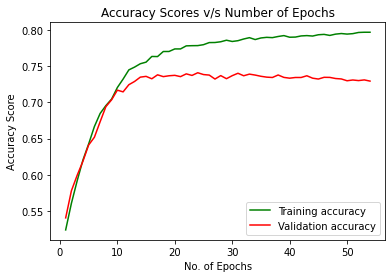

In [66]:
loss = history.history['accuracy']
epochs = range(1, len(loss) + 1)
val_loss = history.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [67]:
#Testing the Trained model on test data
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

375/375 [==============================] - 3s 9ms/step - loss: 0.5453 - accuracy: 0.7333


In [68]:
#Accuracy
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.73


In [69]:
#Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

375/375 [==============================] - 3s 7ms/step




confusion matrix


[[4503 1506]
 [1694 4297]]




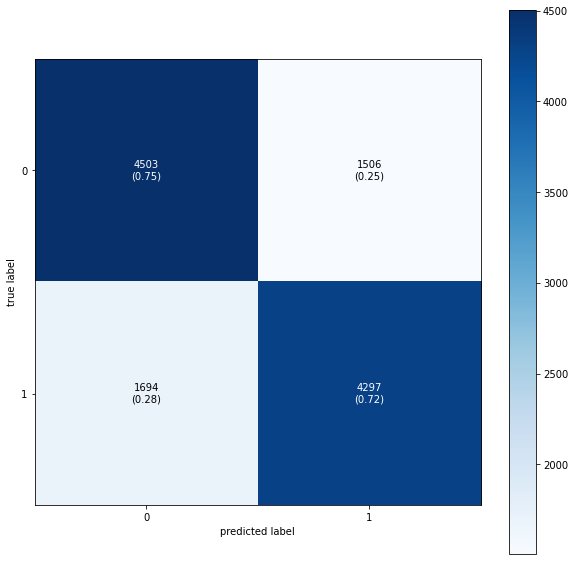

In [70]:
#Confusion matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

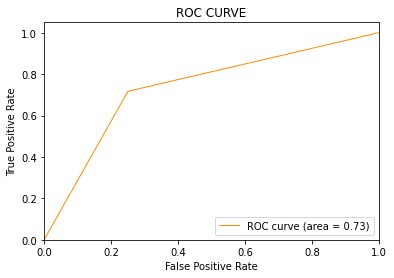

In [71]:
#ROC CURVE
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Pre-trained Model

In [72]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 99.7 MB/s eta 0:00:00


In [73]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [74]:
unmasker("Hello I'm a [MASK] model.")

[{'score': 0.10731087625026703,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i'm a fashion model."},
 {'score': 0.08774493634700775,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i'm a role model."},
 {'score': 0.05338375270366669,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello i'm a new model."},
 {'score': 0.046672236174345016,
  'token': 3565,
  'token_str': 'super',
  'sequence': "hello i'm a super model."},
 {'score': 0.027095822617411613,
  'token': 2986,
  'token_str': 'fine',
  'sequence': "hello i'm a fine model."}]




# bert-base-uncased

In [75]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained("bert-base-uncased")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
output = bert_model(encoded_input)

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


# Then, we create a custom function to host the pre trained BERT model.


In [76]:
def create_model(bert_model, max_len=128):
   model = keras.Sequential()
   attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
   input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
   inputs = Input(name='inputs',shape=[max_len])#step1
   embeddings = bert_model([input_ids,attention_masks])[1]
   lstm_layer = LSTM(units=64)
   model.add(embedding_layer)
   model.add(lstm_layer)
   model.add(Dense(256 , input_shape=(500,) , activation="relu" , name="Hidden_Layer_1"))
   model.add(Dropout(rate=0.3))
   model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
   opt = keras.optimizers.Adamax(learning_rate= 0.001)
   model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
   return model


In [77]:
#Separating the 70% data for training data and 30% for testing data
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [78]:
model1 = create_model(bert_model, max_len=128) # here we are calling the function of created model
model1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

In [79]:
#Training and validating with parameter tuning
early_stop = EarlyStopping(monitor='val_accuracy', patience=10)
history1=model1.fit(X_train,Y_train,batch_size=32,epochs=40, validation_split=0.3,callbacks=[early_stop])# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/40
613/613 [==============================] - 17s 23ms/step - loss: 0.5069 - accuracy: 0.7550 - val_loss: 0.5251 - val_accuracy: 0.7399
Epoch 2/40
613/613 [==============================] - 13s 22ms/step - loss: 0.4822 - accuracy: 0.7705 - val_loss: 0.5304 - val_accuracy: 0.7417
Epoch 3/40
613/613 [==============================] - 13s 22ms/step - loss: 0.4652 - accuracy: 0.7832 - val_loss: 0.5439 - val_accuracy: 0.7388
Epoch 4/40
613/613 [==============================] - 13s 21ms/step - loss: 0.4555 - accuracy: 0.7883 - val_loss: 0.5386 - val_accuracy: 0.7351
Epoch 5/40
613/613 [==============================] - 15s 25ms/step - loss: 0.4435 - accuracy: 0.7924 - val_loss: 0.5394 - val_accuracy: 0.7350
Epoch 6/40
613/613 [==============================] - 13s 22ms/step - loss: 0.4678 - accuracy: 0.7817 - val_loss: 0.5522 - val_accuracy: 0.7345
Epoch 7/40
613/613 [==============================] - 14s 23ms/step - loss: 0.4607 - accuracy: 0.7820 - val_loss: 0.5849 - val_accuracy:

In [80]:
accr1 = model1.evaluate(X_test,Y_test) 

375/375 [==============================] - 3s 9ms/step - loss: 0.6017 - accuracy: 0.7207


In [81]:
#Accuracy
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.72


In [82]:
#Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
y_pred = model1.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

375/375 [==============================] - 3s 8ms/step




confusion matrix


[[3723 2286]
 [1065 4926]]




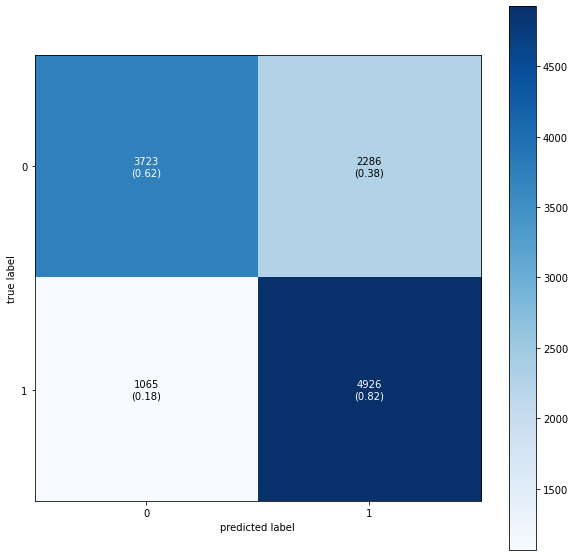

In [83]:
#Confusion matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

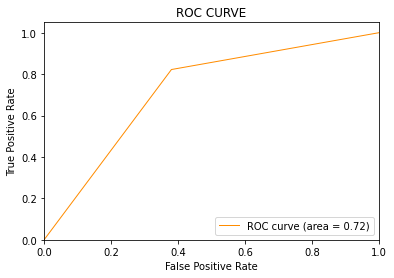

In [84]:
#ROC CURVE
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# bert-large-uncased

In [85]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
bert_model2 = TFBertModel.from_pretrained("bert-large-uncased")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
output = bert_model2(encoded_input)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [86]:
model2 = create_model(bert_model2, max_len=128) # here we are calling the function of created model
model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

In [87]:
#Training and validating with parameter tuning
early_stop = EarlyStopping(monitor='val_accuracy', patience=10)
history2=model2.fit(X_train,Y_train,batch_size=1080,epochs=40, validation_split=0.3,callbacks=[early_stop])# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/40
19/19 [==============================] - 4s 109ms/step - loss: 0.5410 - accuracy: 0.7448 - val_loss: 0.5354 - val_accuracy: 0.7357
Epoch 2/40
19/19 [==============================] - 2s 82ms/step - loss: 0.4672 - accuracy: 0.7805 - val_loss: 0.5382 - val_accuracy: 0.7419
Epoch 3/40
19/19 [==============================] - 2s 84ms/step - loss: 0.4584 - accuracy: 0.7832 - val_loss: 0.5547 - val_accuracy: 0.7311
Epoch 4/40
19/19 [==============================] - 2s 83ms/step - loss: 0.4463 - accuracy: 0.7922 - val_loss: 0.5414 - val_accuracy: 0.7394
Epoch 5/40
19/19 [==============================] - 2s 83ms/step - loss: 0.4323 - accuracy: 0.8007 - val_loss: 0.5521 - val_accuracy: 0.7274
Epoch 6/40
19/19 [==============================] - 2s 83ms/step - loss: 0.4697 - accuracy: 0.7930 - val_loss: 0.6913 - val_accuracy: 0.6554
Epoch 7/40
19/19 [==============================] - 2s 84ms/step - loss: 0.6603 - accuracy: 0.6672 - val_loss: 0.8138 - val_accuracy: 0.5062
Epoch 8/40
1

In [88]:
accr2 = model2.evaluate(X_test,Y_test) 

375/375 [==============================] - 3s 8ms/step - loss: 0.5451 - accuracy: 0.7352


In [ ]:
#Accuracy
print('Test set\n  Accuracy: {:0.2f}'.format(accr2[1])) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.72


In [ ]:
#Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
y_pred = model2.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

375/375 [==============================] - 3s 8ms/step




confusion matrix


[[3723 2286]
 [1065 4926]]




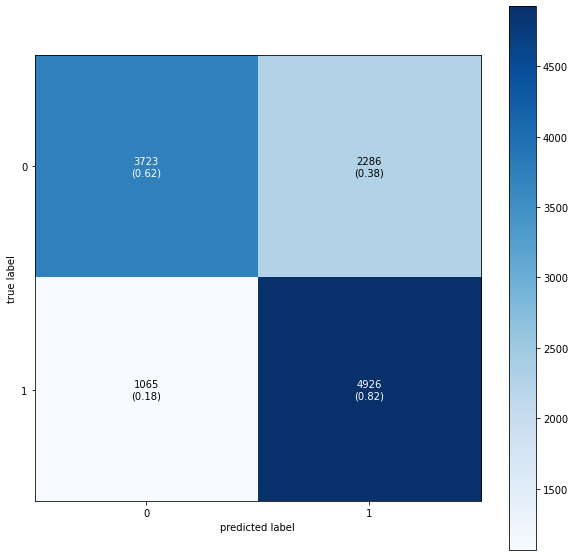

In [ ]:
#Confusion matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

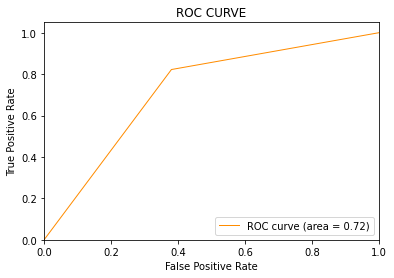

In [ ]:
#ROC CURVE
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# bert-base-cased

In [89]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model3 = TFBertModel.from_pretrained("bert-base-cased")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
output = bert_model3(encoded_input)

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [90]:
model3 =create_model(bert_model3, max_len=128) # here we are calling the function of created model
model3.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

In [91]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=10)
history3=model3.fit(X_train,Y_train,batch_size=1085,epochs=40, validation_split=0.3,callbacks=[early_stop])# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/40
19/19 [==============================] - 4s 116ms/step - loss: 0.5202 - accuracy: 0.7675 - val_loss: 0.5509 - val_accuracy: 0.7306
Epoch 2/40
19/19 [==============================] - 2s 84ms/step - loss: 0.4562 - accuracy: 0.7868 - val_loss: 0.5516 - val_accuracy: 0.7298
Epoch 3/40
19/19 [==============================] - 2s 85ms/step - loss: 0.4471 - accuracy: 0.7923 - val_loss: 0.5458 - val_accuracy: 0.7337
Epoch 4/40
19/19 [==============================] - 2s 91ms/step - loss: 0.4344 - accuracy: 0.7966 - val_loss: 0.5449 - val_accuracy: 0.7327
Epoch 5/40
19/19 [==============================] - 2s 85ms/step - loss: 0.5453 - accuracy: 0.7755 - val_loss: 1.7845 - val_accuracy: 0.4998
Epoch 6/40
19/19 [==============================] - 2s 85ms/step - loss: 0.6254 - accuracy: 0.7163 - val_loss: 0.5585 - val_accuracy: 0.7100
Epoch 7/40
19/19 [==============================] - 2s 85ms/step - loss: 0.4859 - accuracy: 0.7638 - val_loss: 0.5967 - val_accuracy: 0.7063
Epoch 8/40
1

In [94]:
accr3 = model3.evaluate(X_test,Y_test) 

375/375 [==============================] - 3s 9ms/step - loss: 0.6151 - accuracy: 0.7211


In [93]:
#Accuracy
print('Test set\n  Accuracy: {:0.2f}'.format(accr3[1])) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.72


In [95]:
#Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
y_pred = model3.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

375/375 [==============================] - 4s 11ms/step




confusion matrix


[[3607 2402]
 [ 945 5046]]




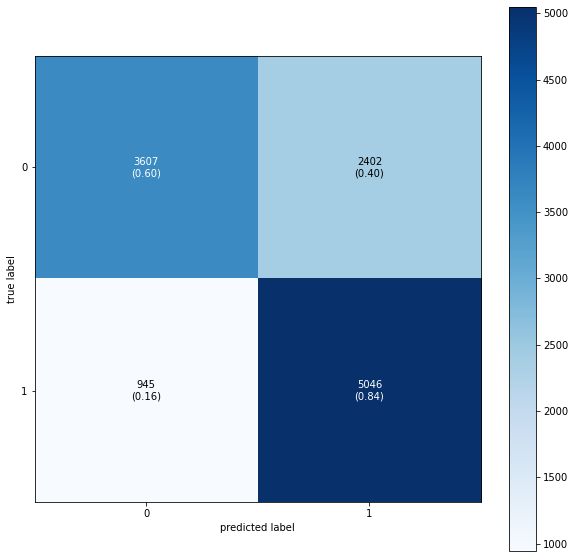

In [96]:
#Confusion matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

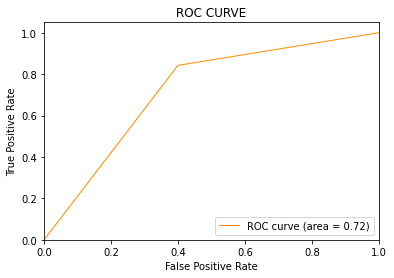

In [97]:
#ROC CURVE
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()